In [21]:
import pandas as pd   # module to work with data in DataFrames.
import seaborn as sns  # module to plot DataFrames in an easy way
import numpy as np
import matplotlib.pyplot as plt
sns.set_context('notebook') # try: 'talk', 'poster', 'notebook'
sns.set_style("darkgrid")

In [22]:
df = pd.read_csv('result_final.csv', encoding='utf-8')
df['sigma'] = pd.Categorical(df['sigma'], ["4", "7", "12", "20", "original"])
df

,Unnamed: 0,test_image,response,resptime,proband,rotation,image,category,sigma
0,0,nature_3_r.jpeg,4,28.686909,Louis,True,nature_3,nature,original
1,1,portrait_9_4.jpeg,1,2.191806,Louis,False,portrait_9,portrait,4
2,2,art_6_20.jpeg,2,4.689927,Louis,False,art_6,art,20
3,3,art_9_12.jpeg,2,3.736233,Louis,False,art_9,art,12
4,4,nature_10_7.jpeg,1,1.395104,Louis,False,nature_10,nature,7
...,...,...,...,...,...,...,...,...,...
2095,2095,art_4_20.jpeg,5,0.700461,Philipp,False,art_4,art,20
2096,2096,portrait_9_7.jpeg,3,2.584903,Philipp,False,portrait_9,portrait,7
2097,2097,nature_6_r_7.jpeg,5,1.550584,Philipp,True,nature_6,nature,7
2098,2098,nature_7_r_20.jpeg,5,1.204270,Philipp,True,nature_7,nature,20


In [ ]:
for category in df['category'].unique():
    d = df[df['category'] == category]
    plt.figure()
    plt.hist(d['response'])
    plt.xlabel('Quality')
    plt.ylabel('Response')
    plt.title(category)
    plt.xlim((1, 5))
    sns.despine()

In [ ]:
g = sns.catplot(x='category', y='response', data=df, hue='sigma',
                kind='bar', ci='sd', 
                palette='inferno',
               col='rotation')



g.set_ylabels('Response')
g.set_xlabels('Category')
g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

In [ ]:
g = sns.catplot(x='category', y='response', data=df, hue='sigma',
                kind='bar', ci='sd', 
                palette='inferno')



g.set_ylabels('Quality')
g.set_xlabels('Category')
g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

In [ ]:
g = sns.catplot(x='category', y='resptime', data=df, hue='sigma',
                kind='bar', 
                palette='inferno')



g.set_ylabels('Response-Time')
g.set_xlabels('Category')
g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

In [ ]:
g = sns.catplot(x='rotation', y='response', data=df, hue='sigma',
                kind='bar', ci='sd', 
                palette='inferno')

g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

In [ ]:
g = sns.catplot(x='rotation', y='response', data=df, hue='proband', col ='sigma',
                kind='bar', ci='sd', 
                palette='inferno', col_wrap=2)

g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

In [ ]:
g = sns.catplot(x='response', y='proband', data=df, hue='rotation', col ='sigma',
                kind='bar', ci='sd', 
                palette='inferno', col_wrap=2)

g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

In [ ]:
g = sns.catplot(x='response', y='proband', data=df, hue='rotation', col ='category',
                kind='bar', ci='sd', 
                palette='inferno')

g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

In [ ]:
g = sns.relplot(x="sigma", y="response", kind="line", data=df, col='proband', col_wrap=3)
g.set(ylim = (0, 5))

In [ ]:
g = sns.relplot(x="sigma", y="response", kind="line", data=df, col='category')
g.set(ylim = (0, 5))

In [ ]:
g = sns.catplot(x='sigma', y='response', data=df, col ='category',
                kind='point', ci='sd',
                palette='inferno')

g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

In [ ]:
g = sns.catplot(x='sigma', y='response', data=df, col ='category',
                kind='point', ci='sd',
                palette='inferno')

g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

In [ ]:
g = sns.catplot(x='sigma', y='response', data=df, col ='category',
                kind='point', ci='sd',
                palette='inferno', hue='proband', col_wrap=1, estimator=np.mean)

g.set_titles('{col_name}')
g.fig.set_size_inches(10, 7)
plt.subplots_adjust(hspace=0.4)
g.fig.set_dpi(300)
g.set(ylim =(0, 5.5))

g.set(yticks=np.arange(0,6,1))

In [39]:
df.head(5)

,Unnamed: 0,test_image,response,resptime,proband,rotation,image,category,sigma
0,0,nature_3_r.jpeg,4,28.686909,Louis,True,nature_3,nature,original
1,1,portrait_9_4.jpeg,1,2.191806,Louis,False,portrait_9,portrait,4
2,2,art_6_20.jpeg,2,4.689927,Louis,False,art_6,art,20
3,3,art_9_12.jpeg,2,3.736233,Louis,False,art_9,art,12
4,4,nature_10_7.jpeg,1,1.395104,Louis,False,nature_10,nature,7


In [43]:
test1 = df.pivot_table(values='response', index=['rotation'],
                    columns=['rotation'], aggfunc=np.mean)
test1

ValueError: Grouper for 'rotation' not 1-dimensional

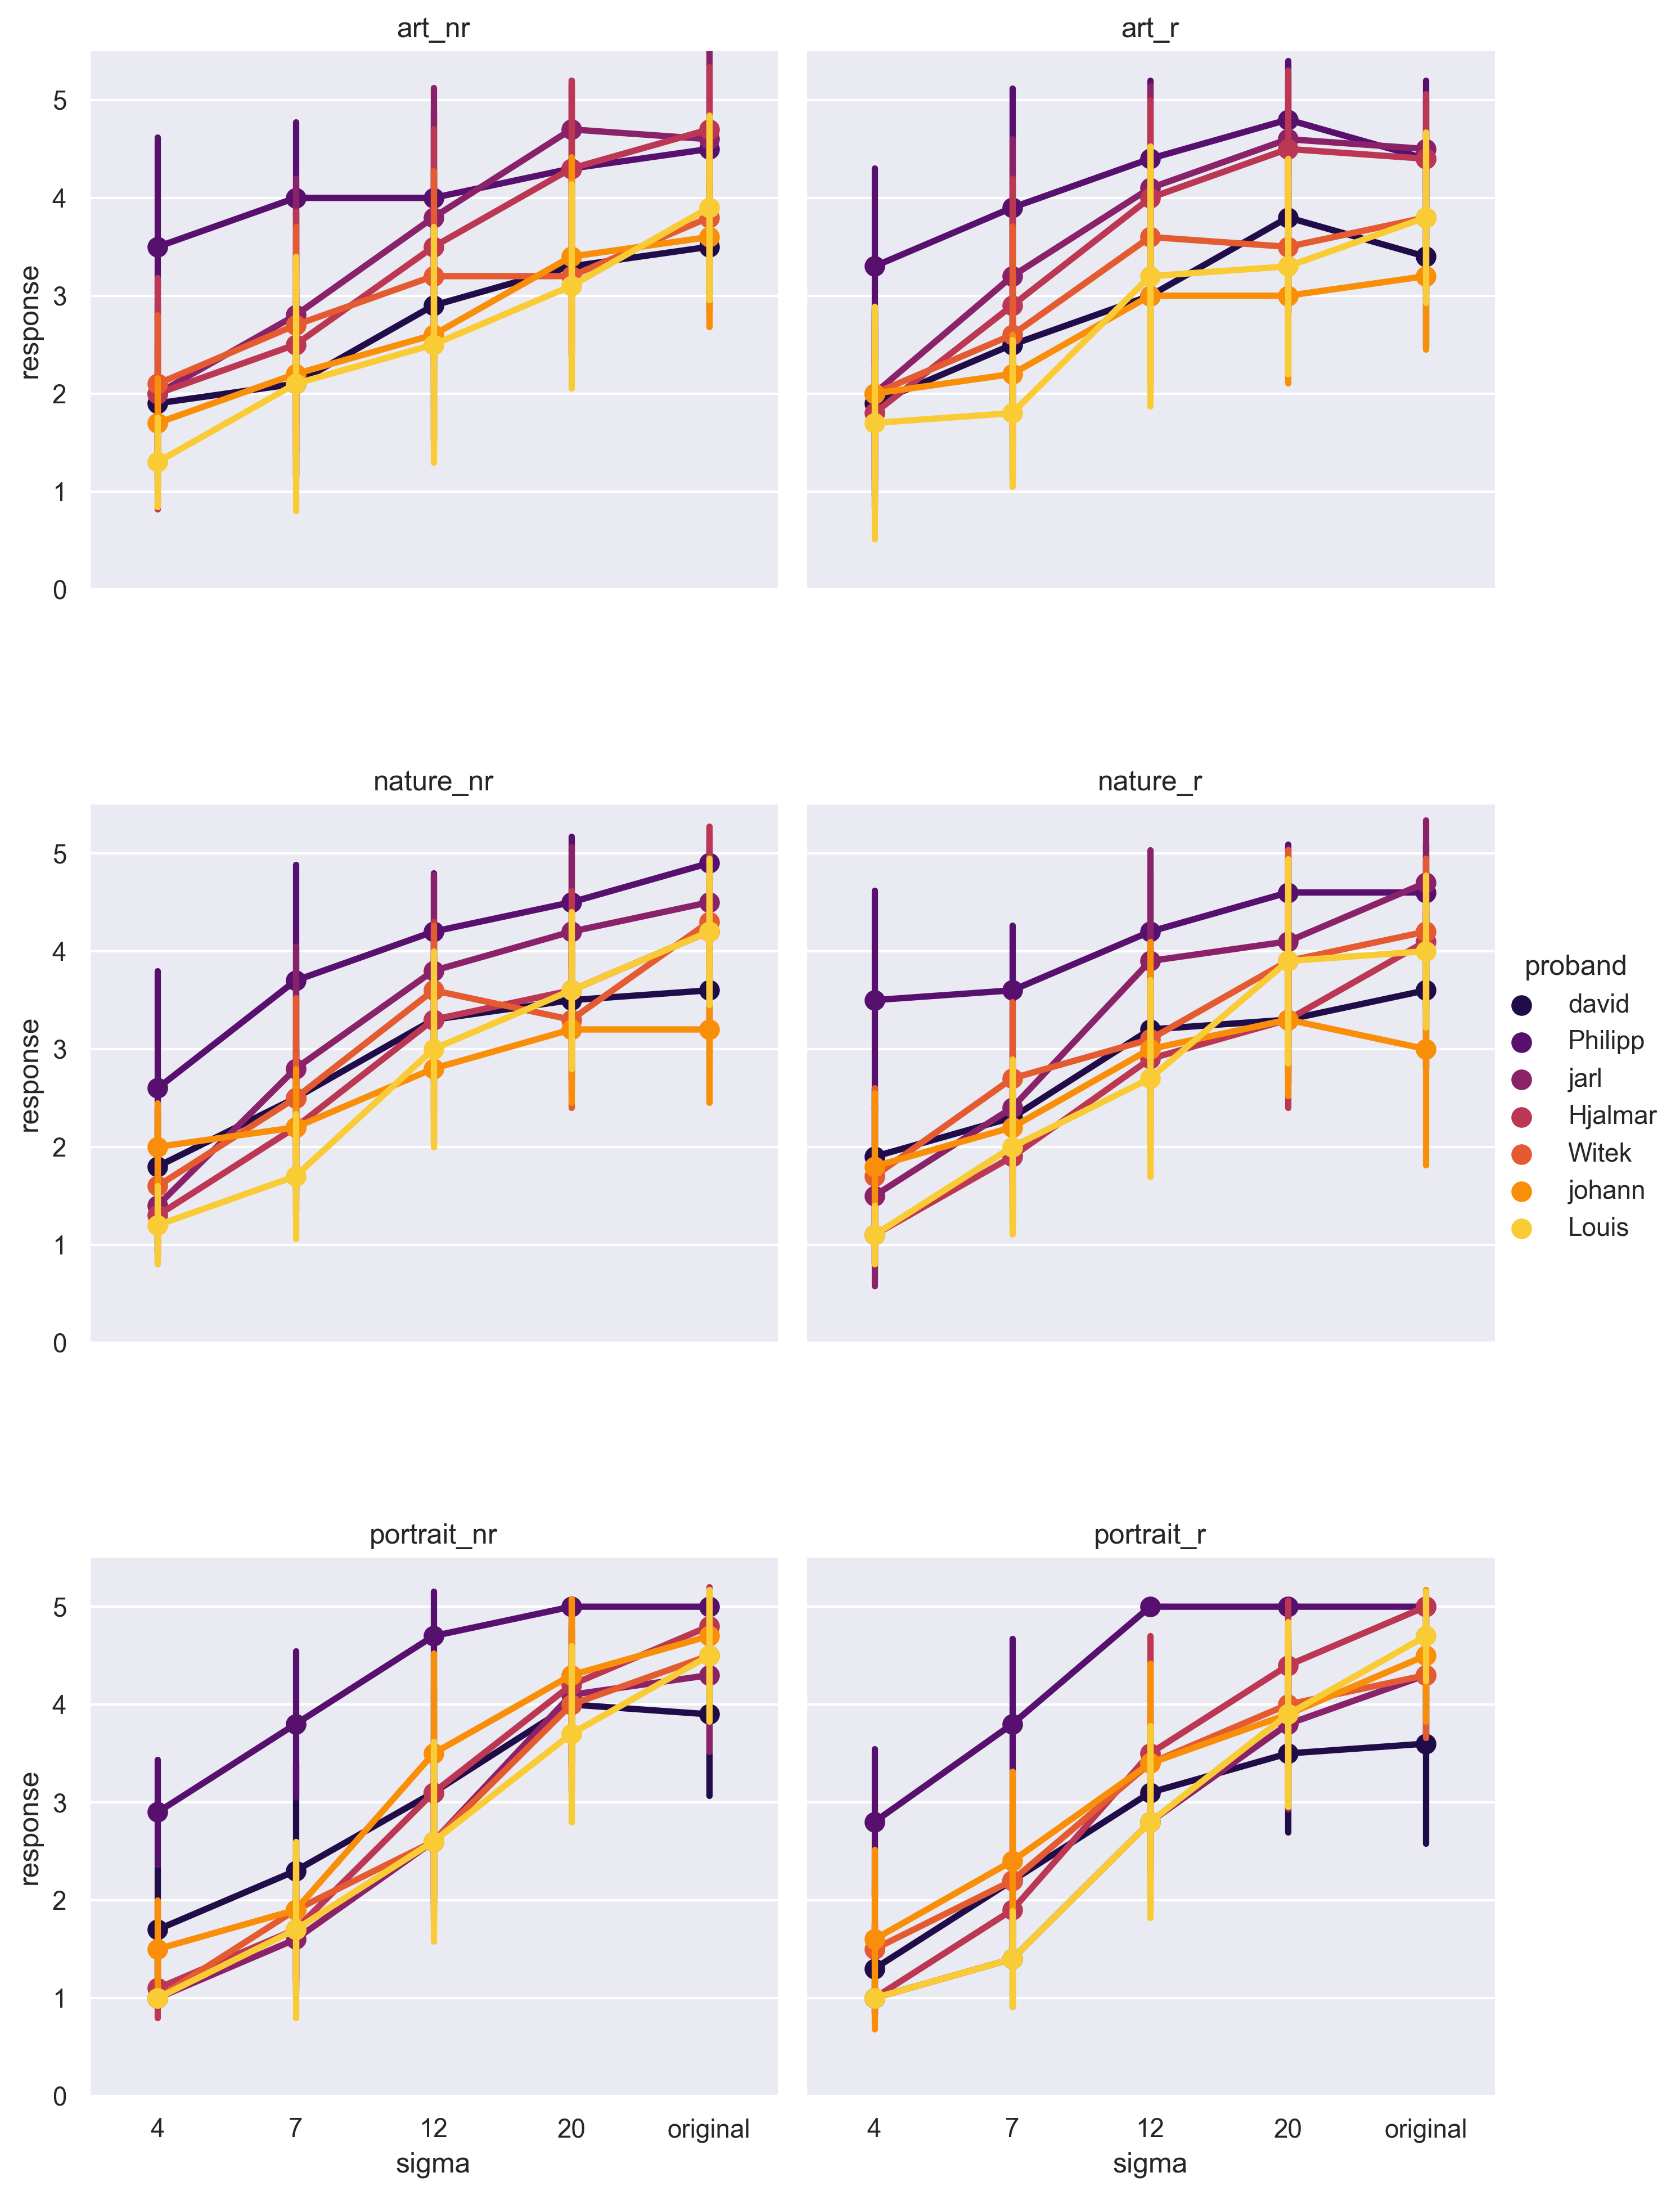

In [104]:
#todo column as row
test = df.copy()
test['combined'] = df["category"].apply(lambda x: x.strip())+"_"+df["rotation"].apply(lambda x: 'r' if x else 'nr')
test['combined'] = pd.Categorical(test['combined'], list(test.columns).sort())
g = sns.catplot(x='sigma', y='response', data=test, col ='combined',
                kind='point', ci='sd',
                palette='inferno', hue='proband', col_wrap=2, estimator=np.mean)

g.set_titles('{col_name}')
g.fig.set_size_inches(10, 13)
plt.subplots_adjust(hspace=0.4)
g.fig.set_dpi(300)
g.set(ylim =(0, 5.5))
g.set(yticks=np.arange(0,6,1))

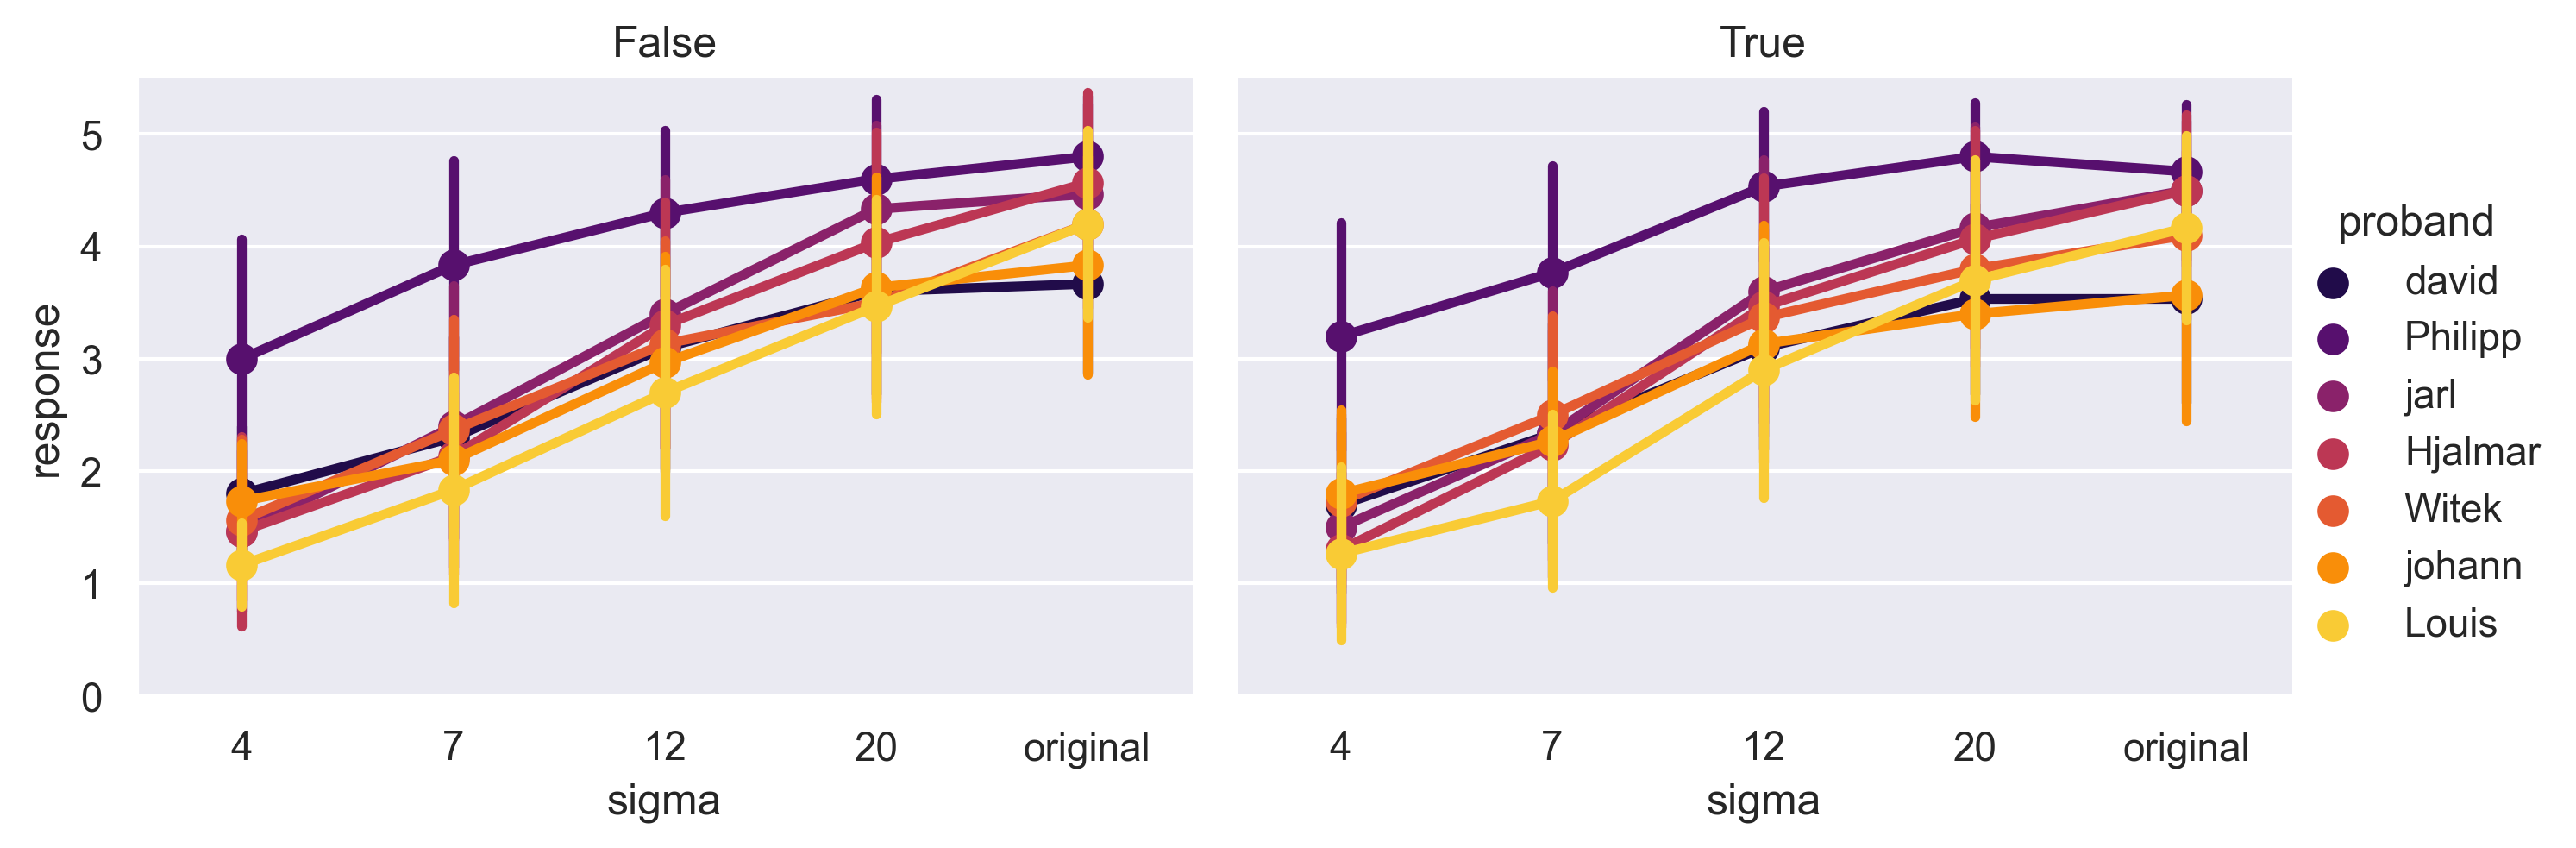

In [100]:
g = sns.catplot(x='sigma', y='response', data=df, col ='rotation',
                kind='point', ci='sd',
                palette='inferno', hue='proband', col_wrap=2, estimator=np.mean)

g.set_titles('{col_name}')
g.fig.set_size_inches(10, 3)
plt.subplots_adjust(hspace=0.4)
g.fig.set_dpi(300)
g.set(ylim =(0, 5.5))
g.set(yticks=np.arange(0,6,1))

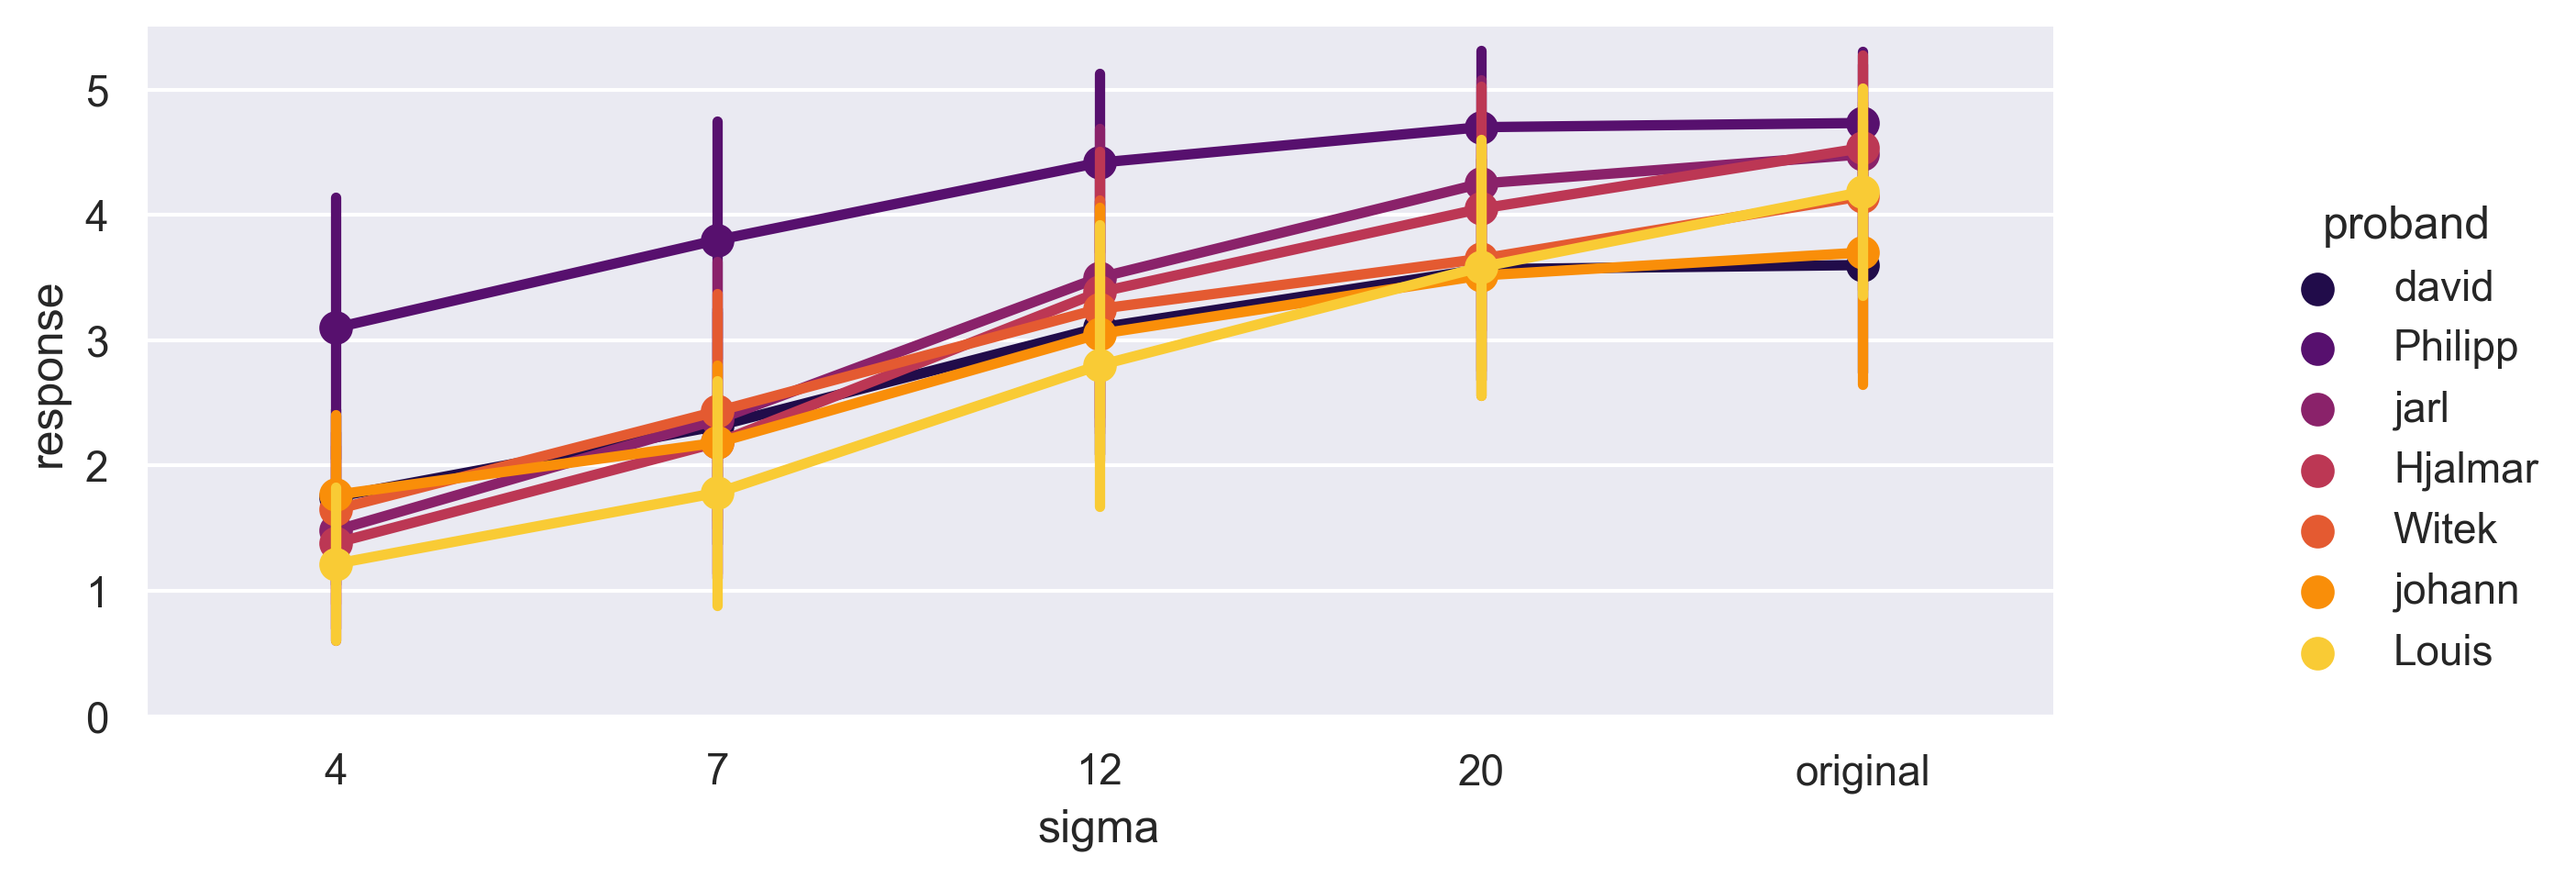

In [101]:
g = sns.catplot(x='sigma', y='response', data=df, kind='point', ci='sd',
                palette='inferno', hue='proband', estimator=np.mean)

g.set_titles('{col_name}')
g.fig.set_size_inches(10, 3)
plt.subplots_adjust(hspace=0.4)
g.fig.set_dpi(300)
g.set(ylim =(0, 5.5))
g.set(yticks=np.arange(0,6,1))

In [88]:
sort_list = df['image'].unique().tolist()
indices = [x for i, x in enumerate(sort_list) if '_10' in x]
for indice in indices:
    sort_list.pop(sort_list.index(indice))
    idx = sort_list.index(indice.replace("_10", "_9"))
    sort_list.insert(idx+1, indice)
    
sort_list = np.array(sort_list).reshape((3,10)).T.flatten()
print(sort_list)

['art_1' 'nature_1' 'portrait_1' 'art_2' 'nature_2' 'portrait_2' 'art_3'
 'nature_3' 'portrait_3' 'art_4' 'nature_4' 'portrait_4' 'art_5'
 'nature_5' 'portrait_5' 'art_6' 'nature_6' 'portrait_6' 'art_7'
 'nature_7' 'portrait_7' 'art_8' 'nature_8' 'portrait_8' 'art_9'
 'nature_9' 'portrait_9' 'art_10' 'nature_10' 'portrait_10']


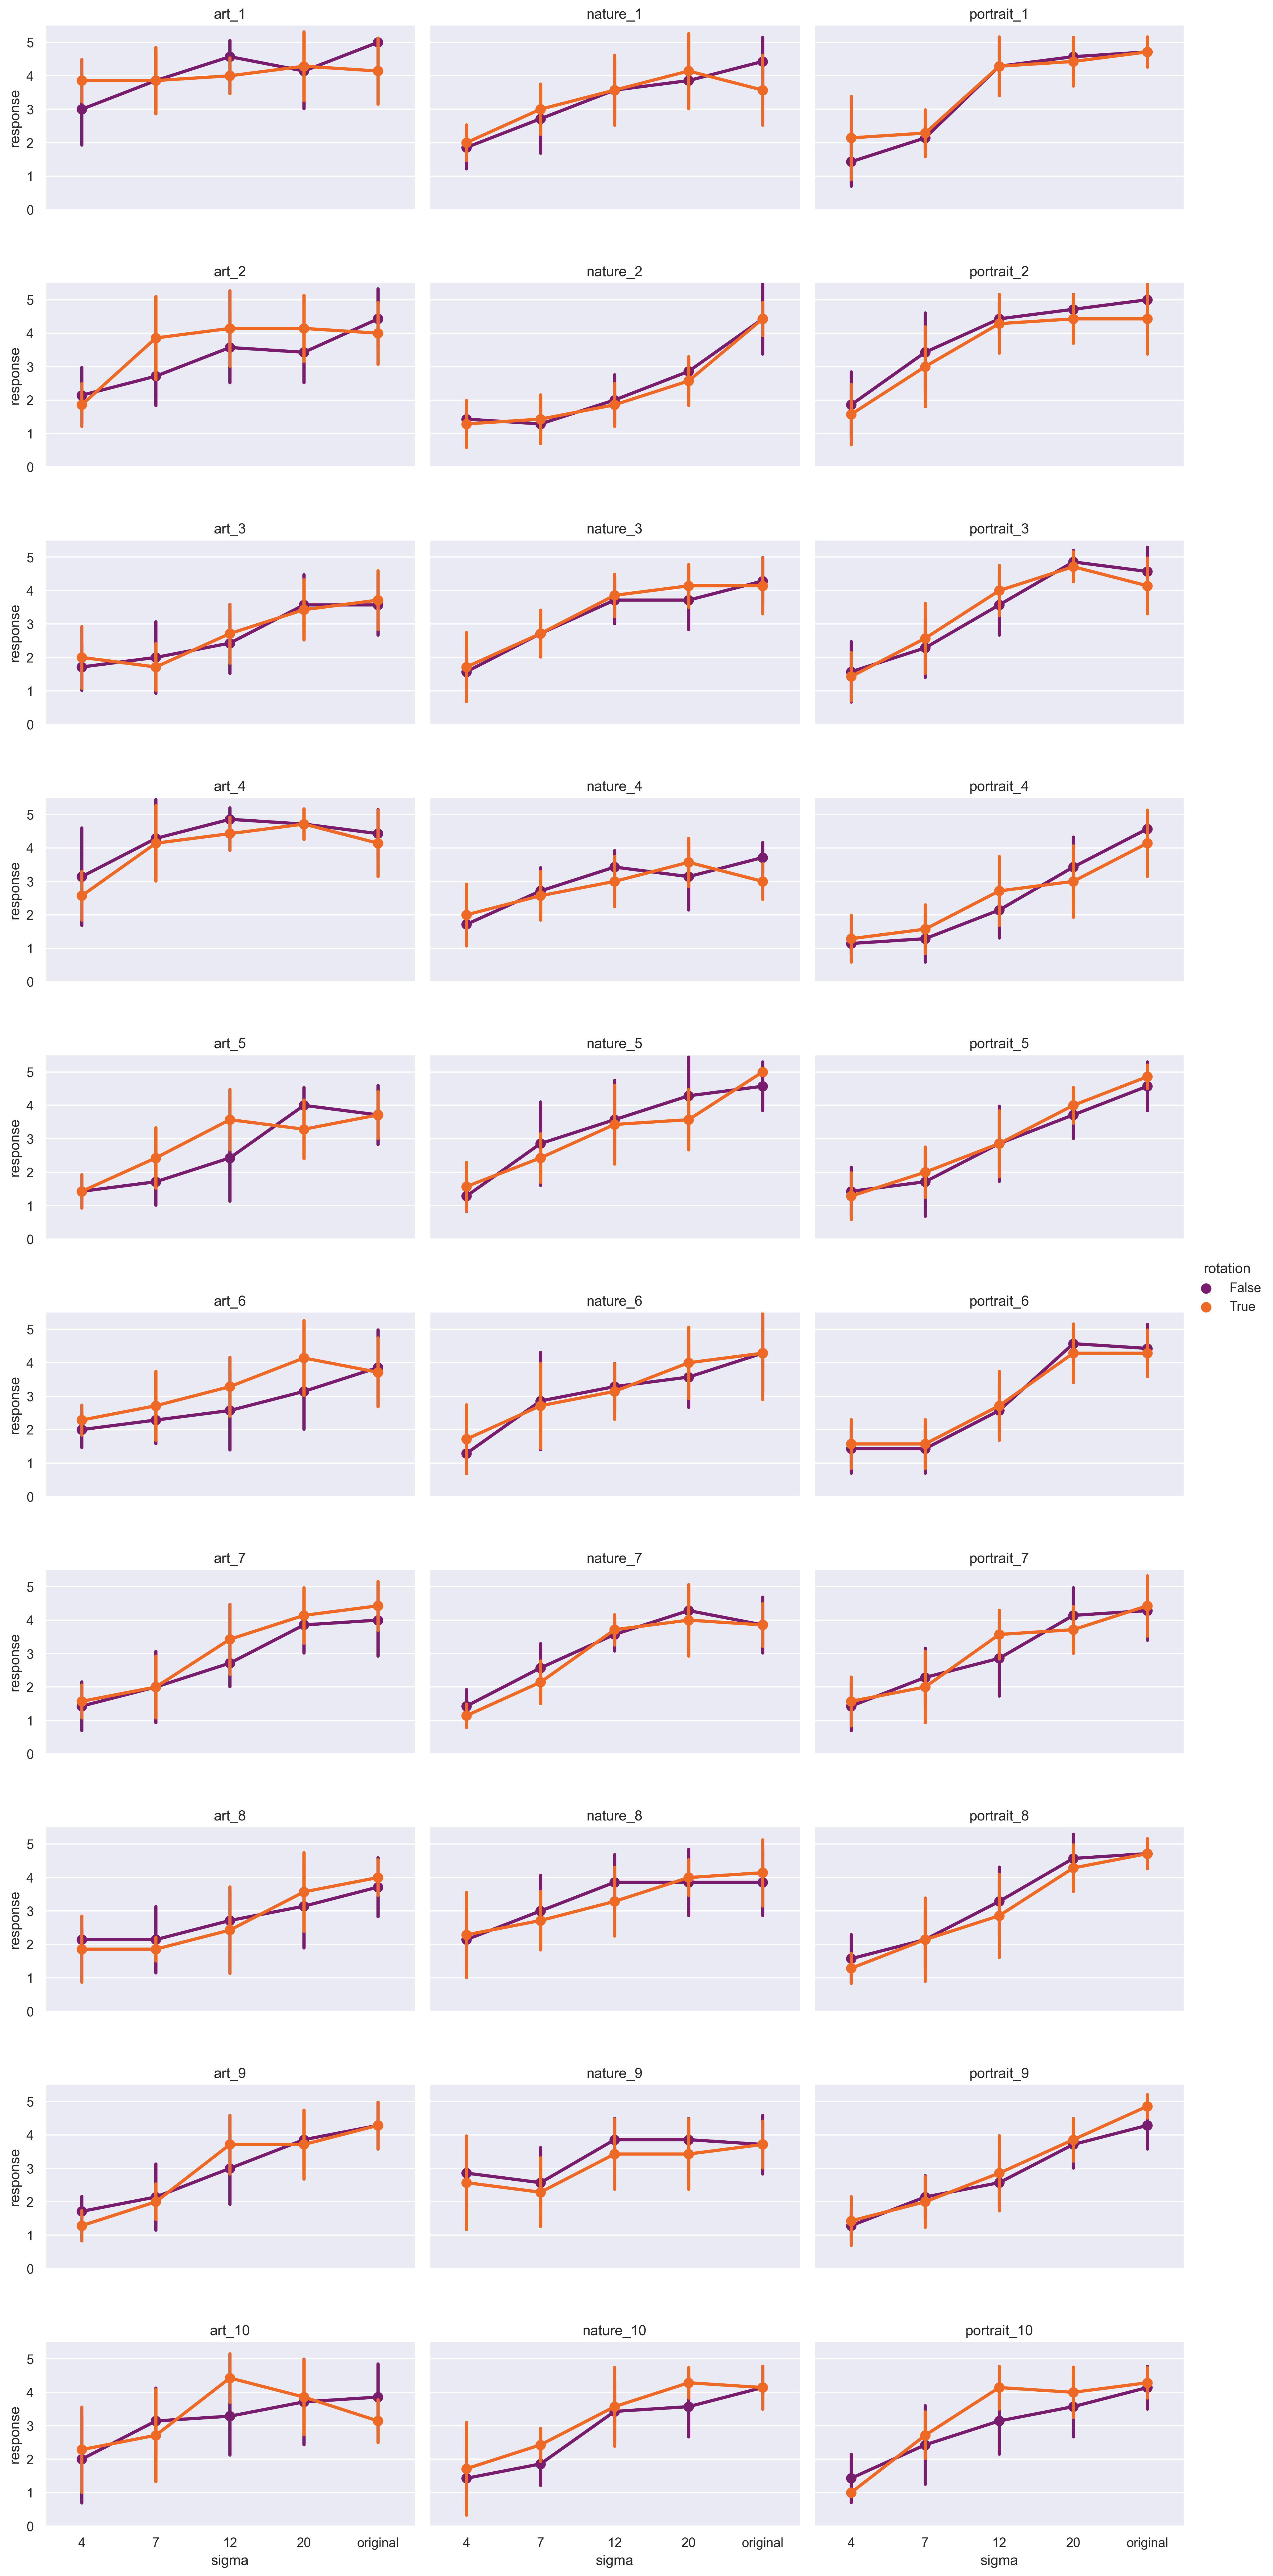

In [98]:
df['image'] = pd.Categorical(df['image'], sort_list)
df = df.sort_values(by=['image'])
g = sns.catplot(x='sigma', y='response', data=df, col ='image',
                kind='point', ci='sd',
                palette='inferno', hue='rotation', col_wrap=3, estimator=np.mean)

g.set_titles('{col_name}')
g.fig.set_size_inches(15, 30)
plt.subplots_adjust(hspace=0.4)
g.fig.set_dpi(300)
g.set(ylim =(0, 5.5))
g.set(yticks=np.arange(0,6,1))
g.fig.get_figure().savefig("out.pdf", dpi=300)

In [ ]:
g = sns.catplot(x='response', y='sigma', data=df, col ='category',
                kind='violin', ci='sd',
                palette='colorblind', col_wrap=1)

g.set_titles('{col_name}')
g.fig.set_size_inches(10,8)
g.fig.set_dpi(300)
g.set(xlim =(0.5, 6))
g.set(xticks=np.arange(0,5.6,1))